In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
xTrain = pd.read_csv('xTrain_System2.csv')
xTest = pd.read_csv('xTest_System2.csv')
yTrain = pd.read_csv('yTrain_System2.csv')
yTest = pd.read_csv('yTest_System2.csv')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.model_selection import GridSearchCV

In [4]:
### General look for different kinds of models
# We first try general tree model (the data do not need standardization)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
rs = 13 # random_state
classifiers = {
    "DecisionTree" : DecisionTreeClassifier(random_state = rs),
    "RandomForest" : RandomForestClassifier(random_state = rs),
    "XGBoost" : XGBClassifier(random_state = rs),
    "LightGBM": LGBMClassifier(random_state = rs)
}

train_scores = []
test_scores = []
fnr_scores = []
auc_scores = []

for key, classifier in classifiers.items():
    print(key)
    classifier.fit(xTrain, yTrain)
    train_score = classifier.score(xTrain, np.ravel(yTrain))
    train_scores.append(train_score)
    test_score = classifier.score(xTest, yTest)
    test_scores.append(test_score)
    
    y_pred = classifier.predict(xTest)
    tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
    fnr = fn/(tp+fn)
    print("false negative rate:",fnr)
    fnr_scores.append(fnr)
    
    print(classification_report(yTest, y_pred))
    
    (fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
    area = auc(fpr,tpr)
    print("AUC area",area)
    auc_scores.append(area)
    print('')
    

print('train_scores',train_scores)
print('test_scores',test_scores)
print('fnr_scores',fnr_scores)

DecisionTree
false negative rate: 0.3941396783432474
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      4132
           1       0.68      0.61      0.64      4539

    accuracy                           0.64      8671
   macro avg       0.65      0.65      0.64      8671
weighted avg       0.65      0.64      0.64      8671

AUC area 0.645621351535056

RandomForest
false negative rate: 0.33818021590658737
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      4132
           1       0.65      0.66      0.66      4539

    accuracy                           0.64      8671
   macro avg       0.64      0.64      0.64      8671
weighted avg       0.64      0.64      0.64      8671

AUC area 0.638872137932476

XGBoost
[18:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' 

In [5]:
# Because for model Logistic, KNN, Support Vector Machine, we need to standardize data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(xTrain)
xTrain_standardized = pd.DataFrame(scaler.transform(xTrain), columns=xTrain.columns)
#xTrain_standardized 
scaler.fit(xTest)
xTest_standardized = pd.DataFrame(scaler.transform(xTest), columns=xTest.columns)
xTest_standardized 

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CNT_FAM_MEMBERS,State servant,Working,Commercial associate,Student,...,Accountants,Security staff,Medicine staff,Cooking staff,IT staff,Cleaning staff,Low-skill Laborers,HR staff,Secretaries,Realty agents
0,-0.725476,-0.828834,0.712189,0.840754,-0.418993,-0.645277,-0.558924,-0.414244,-0.305909,-0.018604,...,-0.456804,-0.061809,-0.320999,-0.186348,-0.08277,-0.054841,3.031368,-0.062742,-0.127171,-0.071416
1,-0.725476,-0.828834,-1.404121,0.125175,-0.468358,-0.645277,1.789152,-0.414244,-0.305909,-0.018604,...,2.189121,-0.061809,-0.320999,-0.186348,-0.08277,-0.054841,-0.329884,-0.062742,-0.127171,-0.071416
2,-0.725476,-0.828834,-1.404121,-0.304172,-0.403036,-0.645277,1.789152,-0.414244,-0.305909,-0.018604,...,2.189121,-0.061809,-0.320999,-0.186348,-0.08277,-0.054841,-0.329884,-0.062742,-0.127171,-0.071416
3,-0.725476,-0.828834,0.712189,-0.781225,-0.413328,0.711464,-0.558924,-0.414244,3.268942,-0.018604,...,-0.456804,-0.061809,3.115275,-0.186348,-0.08277,-0.054841,-0.329884,-0.062742,-0.127171,-0.071416
4,-0.725476,-0.828834,0.712189,-0.876635,-0.444288,2.068204,-0.558924,-0.414244,-0.305909,-0.018604,...,-0.456804,-0.061809,-0.320999,5.366307,-0.08277,-0.054841,-0.329884,-0.062742,-0.127171,-0.071416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,-0.725476,-0.828834,0.712189,-0.638109,-0.406969,2.068204,1.789152,-0.414244,-0.305909,-0.018604,...,-0.456804,-0.061809,3.115275,-0.186348,-0.08277,-0.054841,-0.329884,-0.062742,-0.127171,-0.071416
8667,-0.725476,-0.828834,0.712189,-0.542699,-0.409094,0.711464,1.789152,-0.414244,-0.305909,-0.018604,...,-0.456804,-0.061809,-0.320999,-0.186348,-0.08277,-0.054841,-0.329884,-0.062742,-0.127171,-0.071416
8668,-0.725476,-0.828834,0.712189,0.172880,2.418190,-0.645277,-0.558924,2.414034,-0.305909,-0.018604,...,-0.456804,-0.061809,-0.320999,-0.186348,-0.08277,-0.054841,-0.329884,-0.062742,-0.127171,-0.071416
8669,-0.725476,-0.828834,-1.404121,1.270101,-0.436328,-0.645277,-0.558924,-0.414244,3.268942,-0.018604,...,-0.456804,-0.061809,-0.320999,5.366307,-0.08277,-0.054841,-0.329884,-0.062742,-0.127171,-0.071416


In [6]:
# Use standardized data for all models
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state = rs),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(random_state = rs),
    'Neural Network': MLPClassifier(random_state = rs),
    "DecisionTree" : DecisionTreeClassifier(random_state = rs),
    "RandomForest" : RandomForestClassifier(random_state = rs),
    "XGBoost" : XGBClassifier(random_state = rs),
    "LightGBM": LGBMClassifier(random_state = rs)
}

train_scores = []
test_scores = []
fnr_scores = []
auc_scores = []

for key, classifier in classifiers.items():
    print(key)
    classifier.fit(xTrain_standardized, yTrain)
    train_score = classifier.score(xTrain_standardized, yTrain)
    train_scores.append(train_score)
    test_score = classifier.score(xTest_standardized, yTest)
    test_scores.append(test_score)
    
    y_pred = classifier.predict(xTest_standardized)
    tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
    fnr = fn/(tp+fn)
    print("false negative rate:",fnr)
    fnr_scores.append(fnr)
    
    print(classification_report(yTest, y_pred))
    
    (fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
    area = auc(fpr,tpr)
    print('AUC area',area)
    auc_scores.append(area)
    print('')

print('train_scores',train_scores)
print('test_scores',test_scores)
print('fnr_scores',fnr_scores)
# In terms of test score, they perform worse than tree model without standardiztion.
# Thus, we continue tree model without data standardization with grid search.

LogisticRegression
false negative rate: 0.15862524785194976
              precision    recall  f1-score   support

           0       0.51      0.18      0.27      4132
           1       0.53      0.84      0.65      4539

    accuracy                           0.53      8671
   macro avg       0.52      0.51      0.46      8671
weighted avg       0.52      0.53      0.47      8671

AUC area 0.5109584312531151

KNeighbors
false negative rate: 0.37849746640229126
              precision    recall  f1-score   support

           0       0.59      0.60      0.60      4132
           1       0.63      0.62      0.63      4539

    accuracy                           0.61      8671
   macro avg       0.61      0.61      0.61      8671
weighted avg       0.61      0.61      0.61      8671

AUC area 0.6118161264309937

SVC
false negative rate: 0.23529411764705882
              precision    recall  f1-score   support

           0       0.54      0.30      0.38      4132
           1       0.5

In [15]:
# Grid search: Random Forest
from sklearn.model_selection import GridSearchCV 
parameters = { 
     'n_estimators':(10, 30, 50,100), 
     'max_depth':(4,6,8,10,15), 
     'min_samples_split': (2, 4, 8), 
     'min_samples_leaf': (4,8,12,16),
} 

model_rf = GridSearchCV(RandomForestClassifier(random_state = rs),parameters,cv=5)
model_rf.fit(xTrain , np.ravel(yTrain))
model_rf.best_score_, model_rf.best_params_

(0.5794364804745428,
 {'max_depth': 15,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 100})

train score 0.6698961937716263
test score 0.5864375504555415
false negative rate: 0.2152456488213263
              precision    recall  f1-score   support

           0       0.61      0.37      0.46      4132
           1       0.58      0.78      0.67      4539

    accuracy                           0.59      8671
   macro avg       0.59      0.58      0.56      8671
weighted avg       0.59      0.59      0.57      8671

AUC area 0.5766704960152808


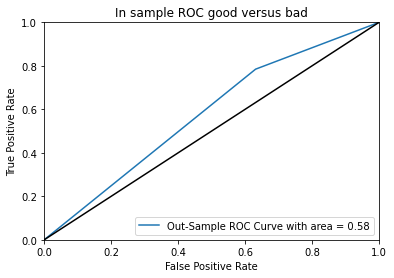

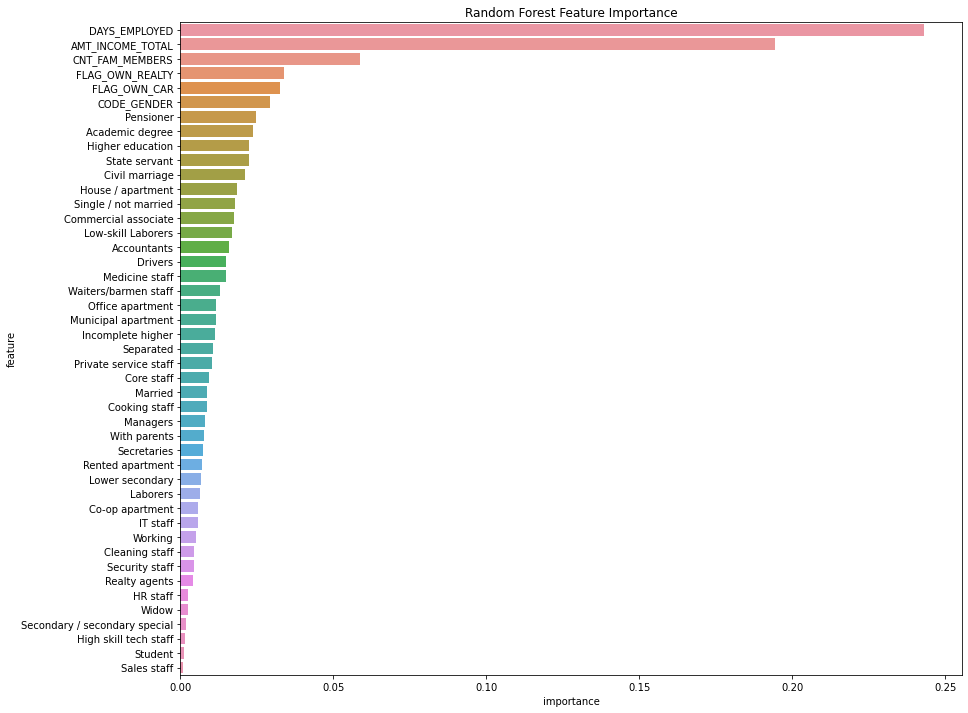

In [24]:
import pylab as pl
model_rf_best = RandomForestClassifier(n_estimators=100, max_depth = 15,min_samples_leaf = 4,min_samples_split=2,random_state = rs)
classifier = model_rf_best
classifier.fit(xTrain, yTrain)
train_score = classifier.score(xTrain, np.ravel(yTrain))
print('train score',train_score)
test_score = classifier.score(xTest, yTest)
print('test score',test_score)

y_pred = classifier.predict(xTest)
tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
fnr = fn/(tp+fn)
print("false negative rate:",fnr)

print(classification_report(yTest, y_pred))

(fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
area = auc(fpr,tpr)
print("AUC area",area)

pl.clf() 
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') 
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC good versus bad')
pl.legend(loc="lower right")
pl.show()

model = model_rf_best
# Draw feature importance level
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
importance = model.feature_importances_
feature_names = [key for key in xTrain]
data = { 'feature' :feature_names, 'importance': importance}
feature_importance_df= pd.DataFrame(data)
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False).index
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
plt.figure(figsize=(14,12))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('Random Forest Feature Importance')
plt.tight_layout
plt.savefig('Random Forest Feature Importance.png')
plt.show()

train score 0.7864063272367771
test score 0.6399492561411602
false negative rate: 0.33818021590658737
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      4132
           1       0.65      0.66      0.66      4539

    accuracy                           0.64      8671
   macro avg       0.64      0.64      0.64      8671
weighted avg       0.64      0.64      0.64      8671

AUC area 0.638872137932476


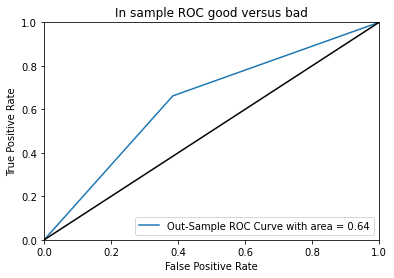

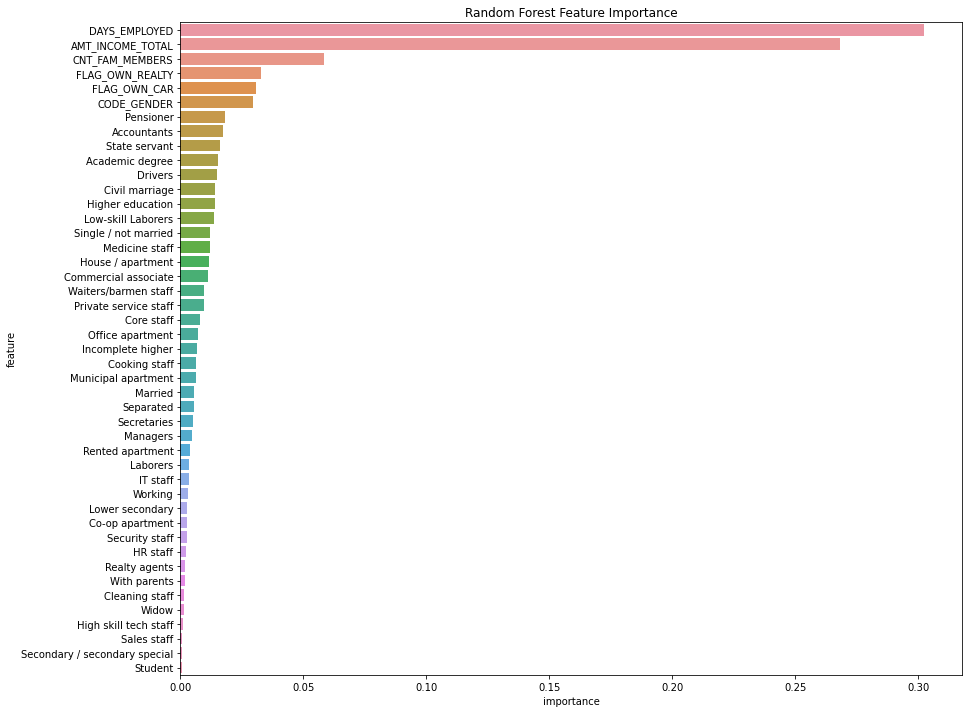

In [27]:
# We notice our default parameter perform better
model_rf_1 = RandomForestClassifier(random_state = rs)
classifier = model_rf_1
classifier.fit(xTrain, yTrain)
train_score = classifier.score(xTrain, np.ravel(yTrain))
print('train score',train_score)
test_score = classifier.score(xTest, yTest)
print('test score',test_score)

y_pred = classifier.predict(xTest)
tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
fnr = fn/(tp+fn)
print("false negative rate:",fnr)

print(classification_report(yTest, y_pred))

(fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
area = auc(fpr,tpr)
print("AUC area",area)

pl.clf() 
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') 
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC good versus bad')
pl.legend(loc="lower right")
pl.savefig('AUC RF system2.png')
pl.show()

model = model_rf_1
# Draw feature importance level
%matplotlib inline
import seaborn as sns
importance = model.feature_importances_
feature_names = [key for key in xTrain]
data = { 'feature' :feature_names, 'importance': importance}
feature_importance_df= pd.DataFrame(data)
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False).index
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
plt.figure(figsize=(14,12))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('Random Forest Feature Importance')
plt.tight_layout
plt.savefig('Random Forest Feature Importance.png')
plt.show()


In [16]:
# Grid search: XGBoost 
parameters = { # due to computer capacity, I didn't tune many parameters as it will long time to run
        'n_estimators':(10, 30, 50,100), 
        'max_depth':(4,6,8,10,15),
    }
model_xgb = GridSearchCV(estimator = XGBClassifier( 
        learning_rate =0.3, 
        min_child_weight=1, 
        subsample=0.6, 
        colsample_bytree=0.7,
        objective= 'binary:logistic', 
        nthread=4, 
        scale_pos_weight=1, 
        seed=rs), 
    param_grid = parameters, 
    #scoring='roc_auc',
    #n_jobs=4, 
    cv=5)
model_xgb.fit(xTrain,yTrain)
model_xgb.fit(xTrain, np.ravel(yTrain))
model_xgb.best_score_, model_xgb.best_params_

[18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

[18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

[18:43:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

[18:43:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

[18:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

[18:44:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

[18:45:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

(0.6153732081067721, {'max_depth': 10, 'n_estimators': 100})

[19:23:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score 0.770489372219476
test score 0.6334909468342752
false negative rate: 0.32562238378497466
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      4132
           1       0.64      0.67      0.66      4539

    accuracy                           0.63      8671
   macro avg       0.63      0.63      0.63      8671
weighted avg       0.63      0.63      0.63      8671

AUC area 0.6314772882624013


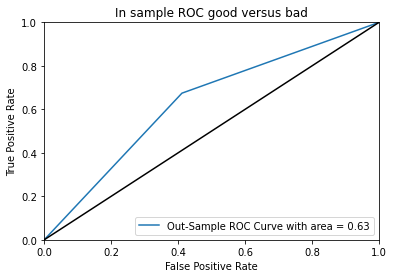

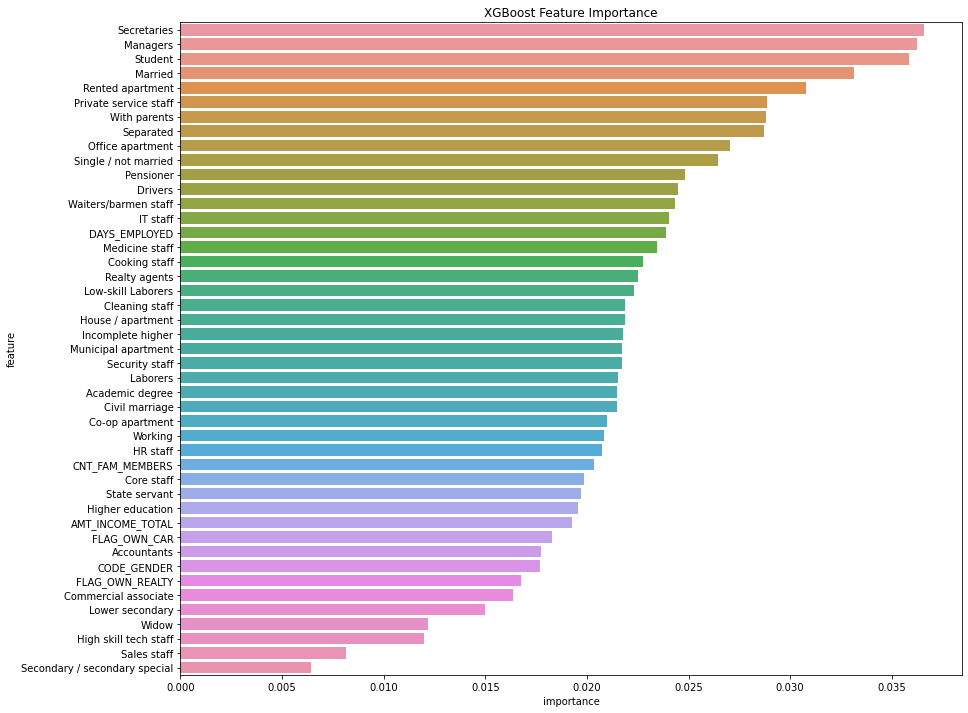

In [25]:
model_xgb_best = XGBClassifier(n_estimators=100, max_depth = 10, random_state = rs)
classifier = model_xgb_best
classifier.fit(xTrain, yTrain)
train_score = classifier.score(xTrain, np.ravel(yTrain))
print('train score',train_score)
test_score = classifier.score(xTest, yTest)
print('test score',test_score)

y_pred = classifier.predict(xTest)
tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
fnr = fn/(tp+fn)
print("false negative rate:",fnr)

print(classification_report(yTest, y_pred))

(fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
area = auc(fpr,tpr)
print("AUC area",area)

pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC good versus bad')
pl.legend(loc="lower right")
pl.savefig('AUC XGB system2.png')
pl.show()

model = model_xgb_best
# Draw feature importance level
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
importance = model.feature_importances_
feature_names = [key for key in xTrain]
data = { 'feature' :feature_names, 'importance': importance}
feature_importance_df= pd.DataFrame(data)
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False).index
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
plt.figure(figsize=(14,12))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('XGBoost Feature Importance')
plt.tight_layout
plt.savefig('XGBoost Feature Importance.png')
plt.show()


In [9]:
# Grid search: lightGBM
parameters = {
    'max_depth': [4,6,8,10,15],
    'num_leaves': [20,30,40],
}

gbm = LGBMClassifier(objective = 'binary',
                         #is_unbalance = True,
                         metric = 'binary_logloss,auc',
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,  
                         random_state = rs,
                        )
model_gbm = GridSearchCV(gbm,param_grid=parameters, cv=5)
model_gbm.fit(xTrain, np.ravel(yTrain))
model_gbm.fit(xTrain, yTrain)

model_gbm.best_score_, model_gbm.best_params_

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored.

(0.8960588398599182, {'max_depth': 15, 'num_leaves': 40})

train score 0.6903114186851211
test score 0.5991235151654942
false negative rate: 0.3053536021150033
              precision    recall  f1-score   support

           0       0.60      0.49      0.54      4132
           1       0.60      0.69      0.64      4539

    accuracy                           0.60      8671
   macro avg       0.60      0.59      0.59      8671
weighted avg       0.60      0.60      0.59      8671

AUC area 0.5944190363093909


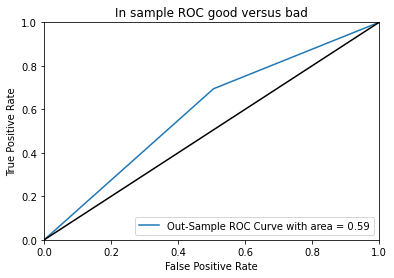

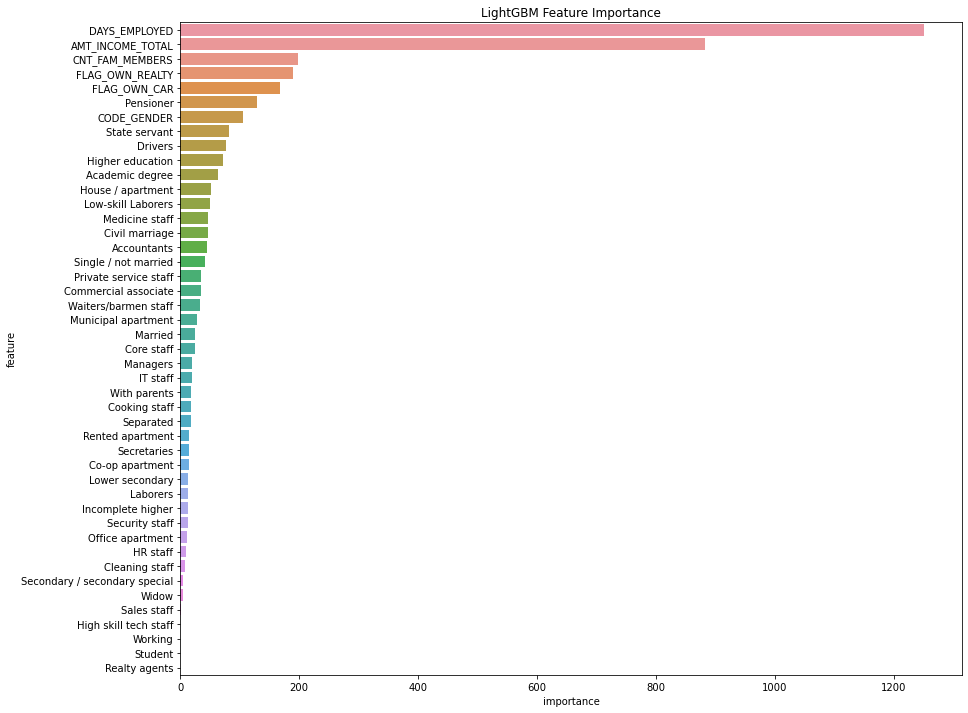

In [26]:
model_gbm_best = LGBMClassifier(max_depth = 15, num_leaves = 40, random_state = rs)
classifier = model_gbm_best
classifier.fit(xTrain, yTrain)
train_score = classifier.score(xTrain, np.ravel(yTrain))
print('train score',train_score)
test_score = classifier.score(xTest, yTest)
print('test score',test_score)

y_pred = classifier.predict(xTest)
tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
fnr = fn/(tp+fn)
print("false negative rate:",fnr)

print(classification_report(yTest, y_pred))

(fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
area = auc(fpr,tpr)
print("AUC area",area)

pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC good versus bad')
pl.legend(loc="lower right")
pl.savefig('AUC GBM system2.png')
pl.show()

model = model_gbm_best
# Draw feature importance level
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
importance = model.feature_importances_
feature_names = [key for key in xTrain]
data = { 'feature' :feature_names, 'importance': importance}
feature_importance_df= pd.DataFrame(data)
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False).index
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
plt.figure(figsize=(14,12))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Feature Importance')
plt.tight_layout
plt.savefig('LightGBM Feature Importance.png')
plt.show()


In [28]:
### Final Model------------------------------------
# After comparing each model, we choose random forest as our final model. 
# Even though XGBoost fnr and accuracy perform a little bit better, when looking at feature importances, the most important features are accountants, sales staff, etc, which are too specific.
# Thus, we prefer Random Forest, because it also performs well and important attributes are more helpful in real wrold.
model = model_rf_1

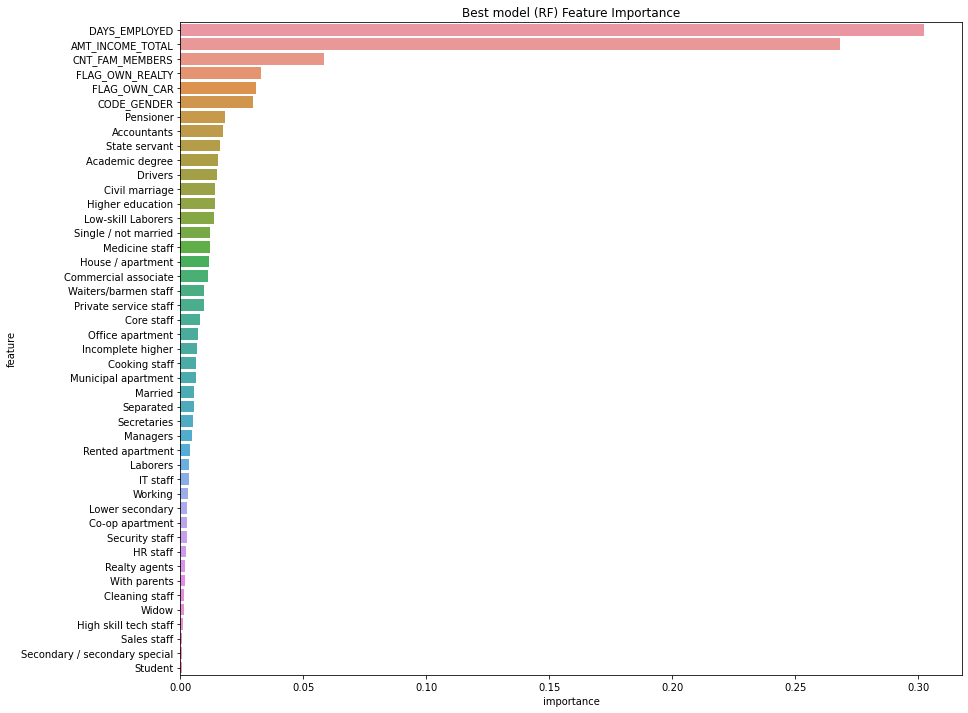

In [29]:
# Draw feature importance level
%matplotlib inline
import seaborn as sns
importance = model.feature_importances_
feature_names = [key for key in xTrain]
data = { 'feature' :feature_names, 'importance': importance}
feature_importance_df= pd.DataFrame(data)
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False).index
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]
plt.figure(figsize=(14,12))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('Best model (RF) Feature Importance')
plt.tight_layout
# plt.savefig('Best model (RF) Feature Importance.png')
plt.show()

